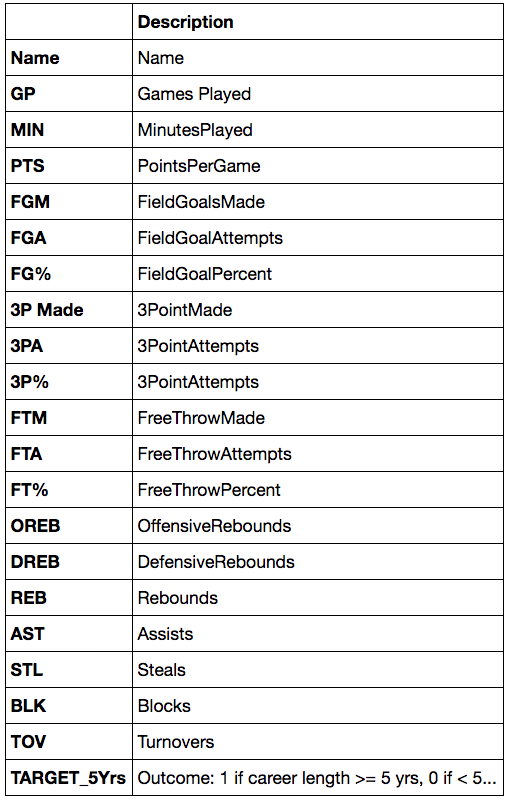

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
nba_data = pd.read_csv('F:/Rahul Subjects/Data Mining/nba_logreg.csv')

In [3]:
nba_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
nba_data['TARGET_5Yrs'] = (nba_data['TARGET_5Yrs'] == True).astype(bool)

In [5]:
nba_data.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs       bool
dtype: object

In [6]:
nba_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,False
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,False
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,False
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,True
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,True


In [7]:
nba_data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [8]:
nba_data[nba_data.isna().any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,False
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,False
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,False
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,True
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,True
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,False
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,False
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,True
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,True
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,False


### 3P% = (3P Made/3PA)*100
### FG% = (FGM/FGA)*100
### FT% = (FTM/FTA)*100

In [9]:
nba_data = nba_data.fillna(0)

### This is because the 3P% is calculated from 3P Made and 3PA. And we can see from the above table that both 3P Made and 3PA are 0's so it is better to fill the 3P% with 0 as well.

In [10]:
X = nba_data.drop('TARGET_5Yrs', axis=1)
X = X.drop('Name', axis=1)
y = nba_data['TARGET_5Yrs']
X['constant'] = 1

In [11]:
mod = sm.OLS(y, X)
res = mod.fit()
res.params

GP          0.007633
MIN        -0.006802
PTS        -0.076036
FGM        -0.010117
FGA         0.087308
FG%         0.011064
3P Made     0.657514
3PA        -0.217938
3P%         0.000699
FTM         0.112513
FTA        -0.011660
FT%         0.002675
OREB        0.048347
DREB       -0.110679
REB         0.084645
AST         0.041699
STL         0.004683
BLK         0.084009
TOV        -0.044502
constant   -0.625934
dtype: float64

In [12]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_5Yrs   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.09e-53
Time:                        21:52:15   Log-Likelihood:                -780.28
No. Observations:                1340   AIC:                             1601.
Df Residuals:                    1320   BIC:                             1705.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0076      0.001      8.539      0.0

| Element | Description |
| --- | --- |
| Dep. Variable | Which variable is the response in the model |
| Model | What model you are using in the fit |
| Method | How the parameters of the model were calculated |
| No. Observations | The number of observations (examples) |
| DF Residuals | Degrees of freedom of the residuals. Number of observations – number of parameters |
| DF Model | Number of parameters in the model (not including the constant term if present) |
| R-squared | The coefficient of determination. A statistical measure of how well the regression line approximates the real data points |
| Adj. R-squared | The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals |
| F-statistic | A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals |
| Prob (F-statistic) | The probability that you would get the above statistic, given the null hypothesis that they are unrelated |
| Log-likelihood | The log of the likelihood function. |
| AIC | The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. |
| BIC | The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. |
|  | The name of the term in the model |
| coef | The estimated value of the coefficient |
| std err | The basic standard error of the estimate of the coefficient. More sophisticated errors are also available. |
| t | The t-statistic value. This is a measure of how statistically significant the coefficient is. |
| P > /t/ | P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. |
| [95.0% Conf. Interval] | The lower and upper values of the 95% confidence interval |
| Skewness | A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). |
| Kurtosis | A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails). |
| Omnibus | D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis. |
| Prob(Omnibus) | The above statistic turned into a probability |
| Jarque-Bera | A different test of the skewness and kurtosis |
| Prob (JB) | The above statistic turned into a probability |
| Durbin-Watson | A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis |
| Cond. No | A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other). |

##### Omnibus/Prob(Omnibus) – 
a test of the skewness and kurtosis of the residual (characteristic #2). We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) is relatively high so the data is somewhat normal, but not altogether ideal. A linear regression approach would probably be better than random guessing but likely not as good as a nonlinear approach.

##### Skew – 
a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

##### Kurtosis – 
a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.

##### Durbin-Watson – 
tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. In this case, the data is close, but within limits.

##### Jarque-Bera (JB)/Prob(JB) – 
like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do.

##### Condition Number – 
This test measures the sensitivity of a function's output as compared to its input (characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. In this case we are well below 30, which we would expect given our model only has two variables and one is a constant.

# Notes - 
##### R-squared should be close to 1 and R-square close to Adjusted R-square means features are relevant to target.
##### Intercept only model: constant column with no other column
##### Specified model: All the features i.e., all the columns other than constant column.
##### Null-Hypothesis:(In case of F-Statistic): These 2 models are equal.
##### Alternate Hypothesis: Intercept only model is worse than specified model(our model).

### F-statistic:
##### p-value close to 0 and f-statistic value should be really large. We can reject null hypothesis.
##### In our case p-value is close to 0 and f-statistic value is large but not that large. We can reject null hypothesis i.e., the specified model(our model) fits the data better than the intercept only model(model with no columns/features). 

##### f-statistic greater than 1 and p-value close to 0 and less than 0.05 means the features are closely related to the target variable.

### T-statistic:
##### Null-Hypothesis: the feature value is going to be equal to 0.
##### Alternate-Hypothesis: feature coefficient value will not be equal to 0.
##### P>|t| = p-value of t-test
##### t = t-value
##### Higher t-value the greater the chances that you reject the null hypothesis & you accept the alternate hypothesis.
##### Lower p-value (i.e., p<0.05) reject the null hypothesis.
##### Rejecting null hypothesis means the weight values are non-zero.
##### Accepting null hypothesis means the wieght value of a feature will be 0 i.e., feature will be irrelevant.


In [13]:
model = sm.Logit(y, X)

In [14]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.550764
         Iterations 6


In [15]:
result.params

GP          0.035558
MIN        -0.059434
PTS        -0.204673
FGM        -0.111647
FGA         0.330626
FG%         0.036013
3P Made     3.510204
3PA        -1.195384
3P%         0.003912
FTM         0.699007
FTA        -0.228349
FT%         0.011912
OREB        0.230910
DREB       -0.776421
REB         0.655440
AST         0.303468
STL        -0.000801
BLK         0.581497
TOV        -0.289856
constant   -4.641212
dtype: float64

In [16]:
result.predict(X)

0       0.164867
1       0.236436
2       0.472470
3       0.609138
4       0.528959
          ...   
1335    0.752543
1336    0.526289
1337    0.574770
1338    0.470398
1339    0.353481
Length: 1340, dtype: float64

In [17]:
(result.predict(X) >= 0.5).astype(int)

0       0
1       0
2       0
3       1
4       1
       ..
1335    1
1336    1
1337    1
1338    0
1339    0
Length: 1340, dtype: int32

In [18]:
result.pred_table()

array([[272., 237.],
       [141., 690.]])

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1320
Method:                           MLE   Df Model:                           19
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.1705
Time:                        21:52:30   Log-Likelihood:                -738.02
converged:                       True   LL-Null:                       -889.75
Covariance Type:            nonrobust   LLR p-value:                 3.930e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0356      0.005      7.556      0.000       0.026       0.045
MIN           -0.0594      0.033     -1.792      0.073      -0.124       0.006
PTS           -0.2047      0.880     -0.232      0.816      -1.930       1.521
FGM           -0.1116      1.741     -0.064      0.949      -3.524       3.300
FGA            0.3306      0.231      1.433      0.152      -0.122       0.783
FG%            0.0360      0.021      1.678      0.093      -0.006       0.078
3P Made        3.5102      1.328      2.643      0.008       0.907       6.113
3PA           -1.1954      0.410     -2.919      0.004      -1.998      -0.393
3P%            0.0039      0.005      0.745      0.456      -0.006       0.014
FTM            0.6990      1.017      0.687      0.492      -1.294       2.692
FTA           -0.2283      0.468     -0.488      0.626      -1.146       0.689
FT%            0.0119      0.010      1.206      0.228      -0.007       0.031
OREB           0.2309      1.279      0.181      0.857      -2.276       2.738
DREB          -0.7764      1.276     -0.609      0.543      -3.277       1.724
REB            0.6554      1.269      0.516      0.606      -1.832       3.143
AST            0.3035      0.112      2.720      0.007       0.085       0.522
STL           -0.0008      0.317     -0.003      0.998      -0.622       0.621
BLK            0.5815      0.269      2.164      0.030       0.055       1.108
TOV           -0.2899      0.271     -1.071      0.284      -0.820       0.240
constant      -4.6412      1.221     -3.801      0.000      -7.034      -2.248
==============================================================================
"""

In [20]:
mod = sm.Logit(y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.550764
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1320
Method:                           MLE   Df Model:                           19
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.1705
Time:                        21:52:36   Log-Likelihood:                -738.02
converged:                       True   LL-Null:                       -889.75
Covariance Type:            nonrobust   LLR p-value:                 3.930e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0356      0.005      7.556      0.000       0.026       0.045
MIN           -0.0594      0.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))

   Specs        Score
0     GP  1060.842007
1    MIN   529.628595
2    PTS   373.235386
4    FGA   251.634496
14   REB   167.499527


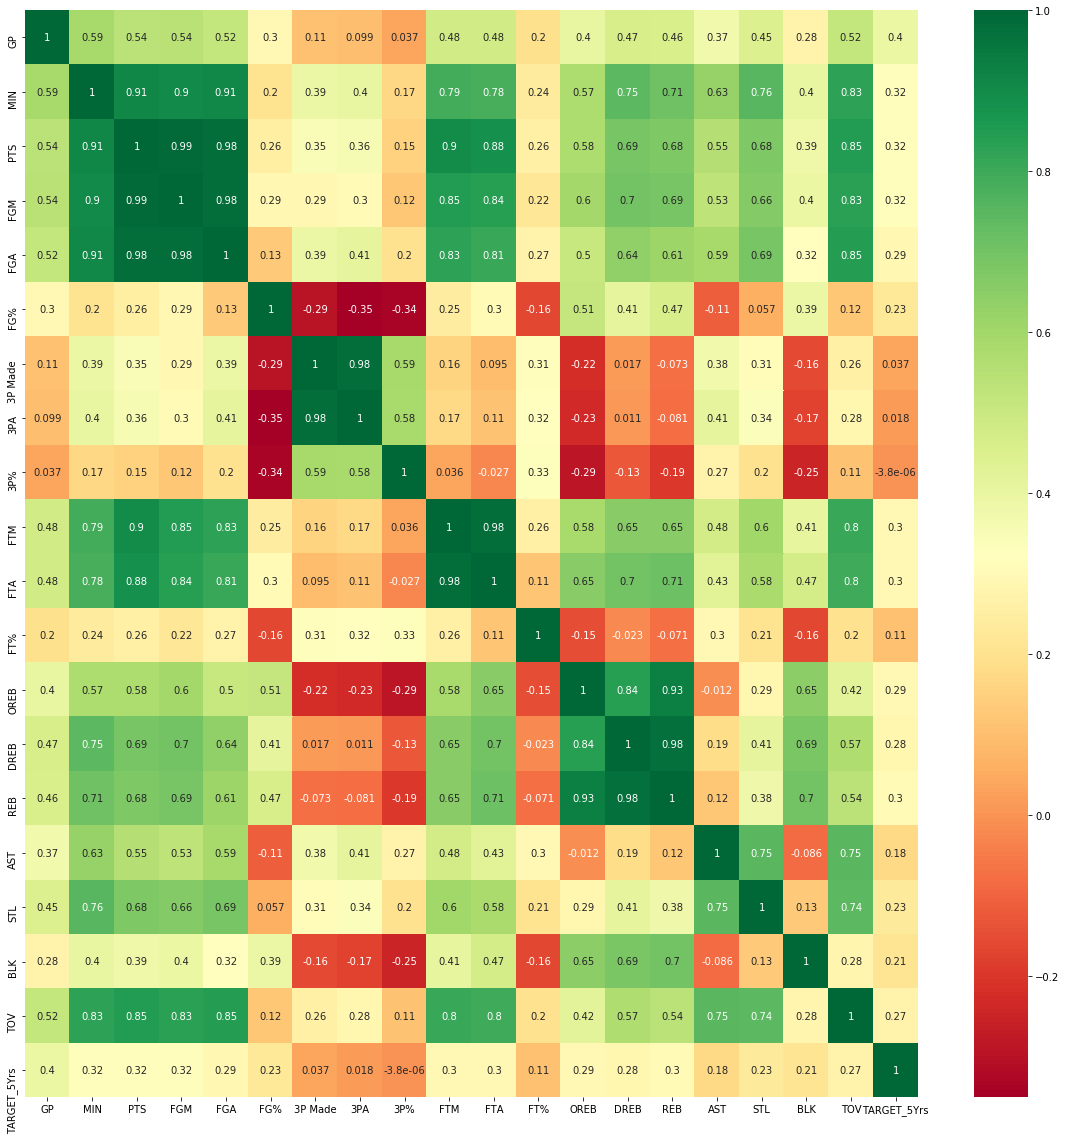

In [22]:
#get correlations of each features in dataset
corrmat = nba_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(nba_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
nba_data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000


In [24]:
X.describe(include='all')

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,constant
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.0
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,1.0
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.0
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,1.0
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,1.0
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.0
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.0
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.0


In [25]:
X.agg(['count', 'sum', 'mean', 'mad', 'median', 'min', 'max', 'prod', 'var', 'std', 'sem', 'skew', 'kurt', 'quantile'])

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,constant
count,1340.000000,1.340000e+03,1340.000000,1340.000000,1340.000000,1.340000e+03,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1.340000e+03,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.0
sum,80955.000000,2.361700e+04,9114.000000,3523.000000,7886.300000,5.918700e+04,331.800000,1044.100000,25660.500000,1738.900000,2441.400000,94202.400000,1352.600000,2.714500e+03,4066.200000,2077.700000,828.800000,493.900000,1599.400000,1340.0
mean,60.414179,1.762463e+01,6.801493,2.629104,5.885299,4.416940e+01,0.247612,0.779179,19.149627,1.297687,1.821940,70.300299,1.009403,2.025746e+00,3.034478,1.550522,0.618507,0.368582,1.193582,1.0
mad,15.007513,6.857299e+00,3.351408,1.300744,2.787205,4.798544e+00,0.285996,0.811745,14.072878,0.713895,0.965661,8.108037,0.600133,1.029301e+00,1.568753,1.051054,0.311915,0.293694,0.552322,0.0
median,63.000000,1.610000e+01,5.550000,2.100000,4.800000,4.410000e+01,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000e+00,2.500000,1.100000,0.500000,0.200000,1.000000,1.0
min,11.000000,3.100000e+00,0.700000,0.300000,0.800000,2.380000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e-01,0.300000,0.000000,0.000000,0.000000,0.100000,1.0
max,82.000000,4.090000e+01,28.200000,10.200000,19.800000,7.370000e+01,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000e+00,13.900000,10.600000,2.500000,3.900000,4.400000,1.0
prod,0.000000,inf,inf,inf,inf,inf,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,2.550980e+286,inf,0.000000,0.000000,0.000000,31.816690,1.0
var,303.944086,6.902226e+01,18.988198,2.834358,12.913159,3.767110e+01,0.147216,1.127520,257.662233,0.974655,1.750287,111.904227,0.603915,1.849620e+00,4.234434,2.164339,0.167902,0.184083,0.522065,0.0
std,17.433992,8.307964e+00,4.357545,1.683555,3.593488,6.137679e+00,0.383688,1.061847,16.051861,0.987246,1.322984,10.578479,0.777119,1.360008e+00,2.057774,1.471169,0.409759,0.429049,0.722541,0.0


| Function | Description |
| --- | --- |
| count | Number of non-null observations |
| sum | Sum of values |
| mean | Mean of values |
| mad | Mean absolute devaition |
| median | Arithmetic median of values |
| min | Minimum |
| max | Maximum |
| prod | Product of values |
| var | Unbiased variance |
| std | Unbiased standard deviation |
| sem | Unbiased standard error of the mean |
| skew | Unbiased skewness (3rd moment) |
| kurt | Unbiased kurtosis (4th moment) |
| quantile | Sample quantile (value at %) |

In [26]:
X.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,constant
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.037133,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,NaN
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.168070,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,NaN
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.154955,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,NaN
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.122542,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,NaN
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.201186,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,NaN
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.336502,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,NaN
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.591733,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,NaN
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.584853,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,NaN
3P%,0.037133,0.168070,0.154955,0.122542,0.201186,-0.336502,0.591733,0.584853,1.000000,0.036245,-0.027249,0.332458,-0.289399,-0.125716,-0.193082,0.266898,0.198237,-0.246358,0.111495,NaN
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.036245,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,NaN


In [27]:
df = nba_data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229DA5C8508>,
      dtype=object)

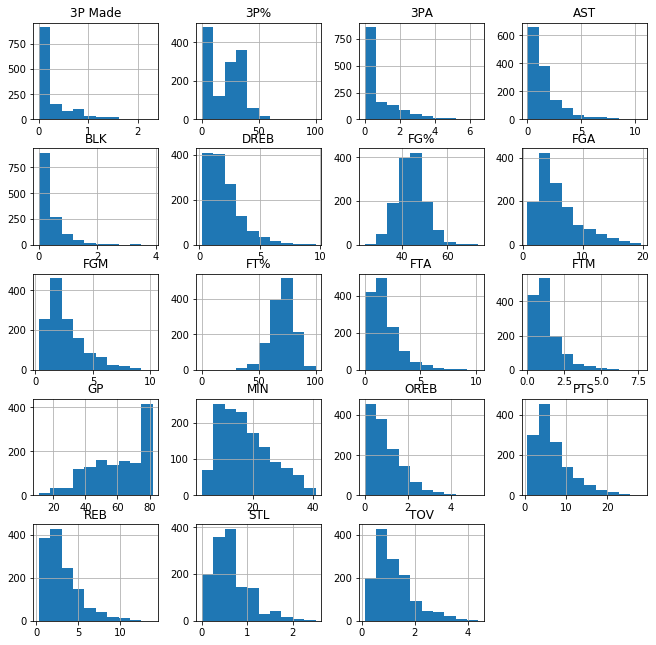

In [28]:
 df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

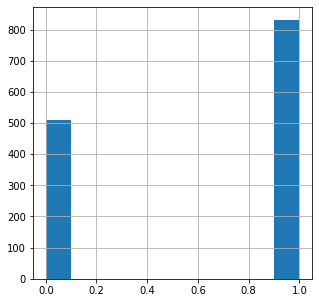

In [29]:
df['TARGET_5Yrs'].astype(int).hist(figsize=[5,5])

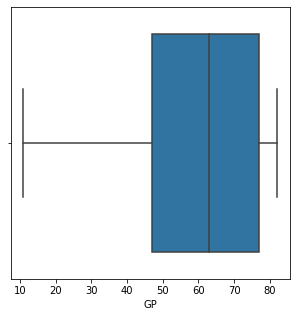

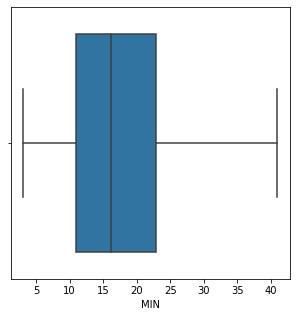

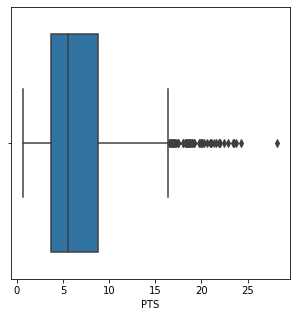

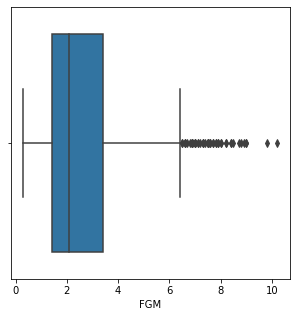

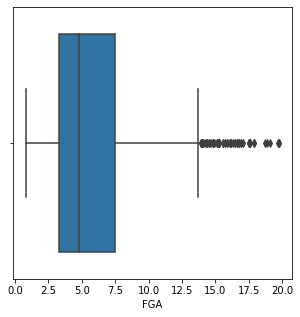

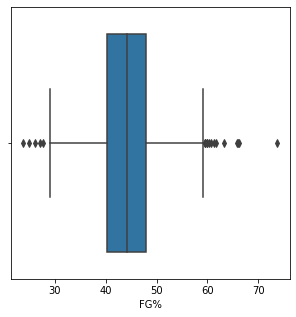

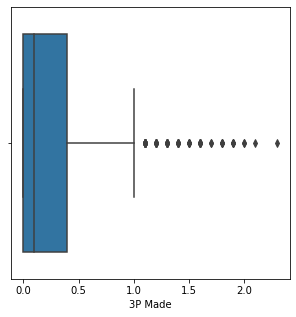

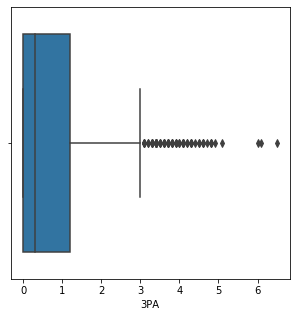

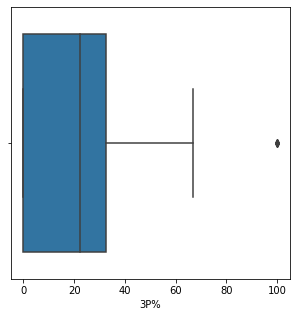

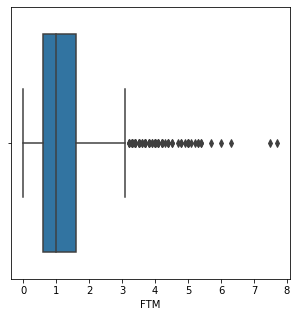

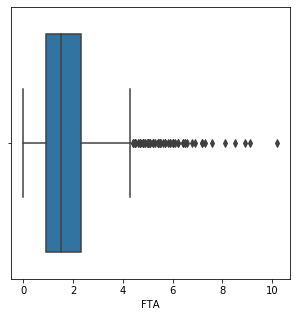

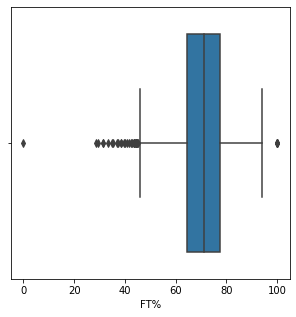

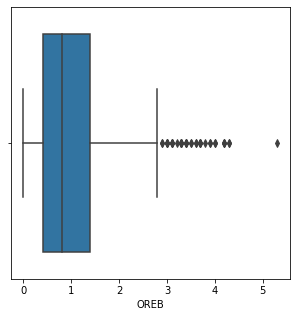

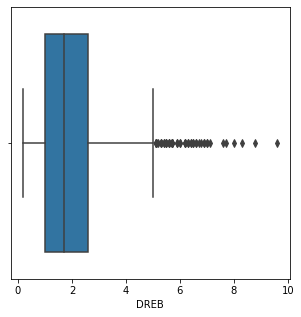

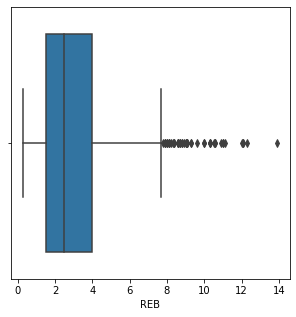

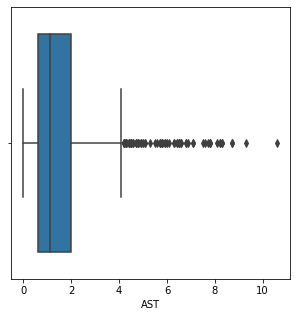

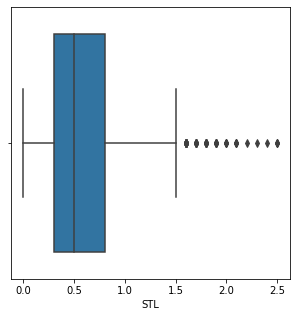

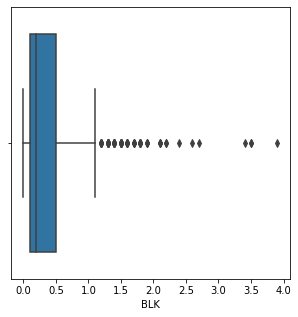

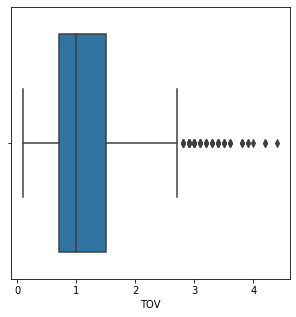

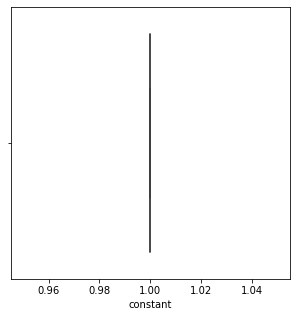

In [30]:
for col in X.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=X[col])

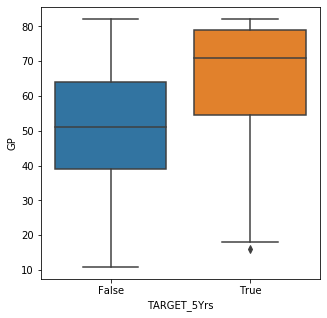

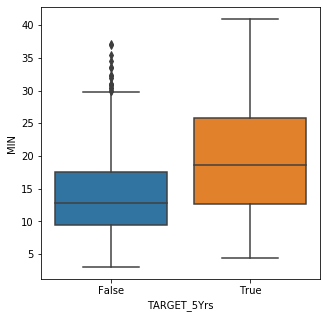

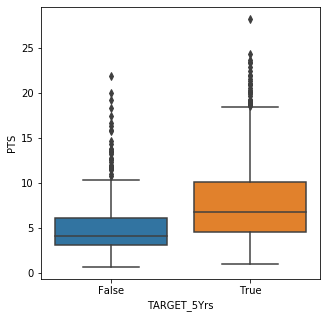

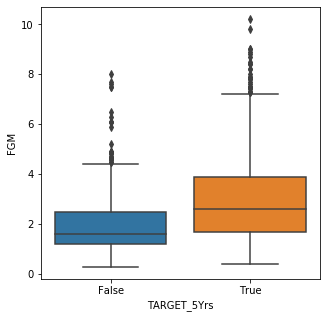

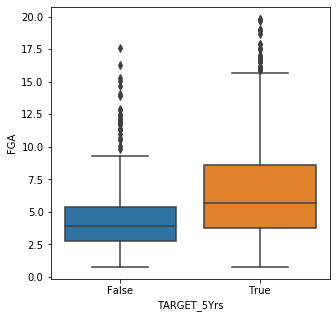

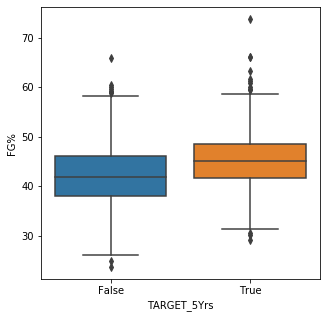

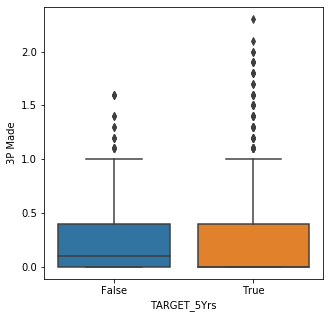

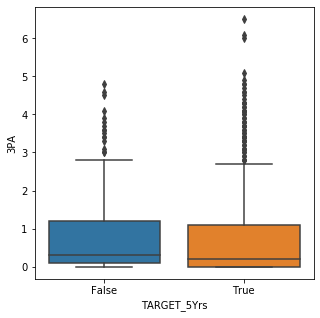

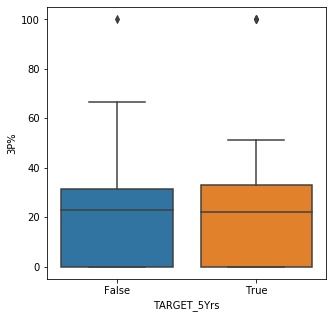

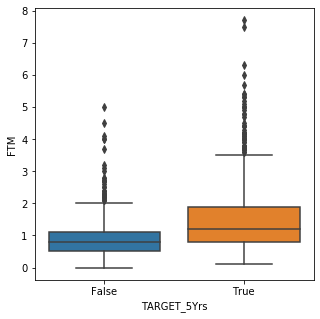

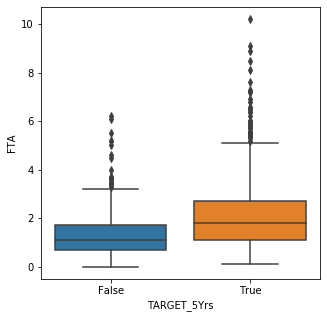

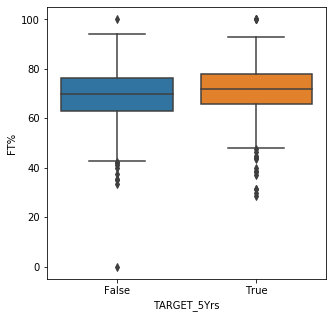

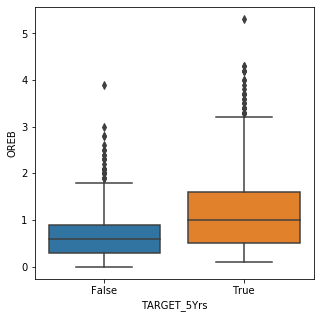

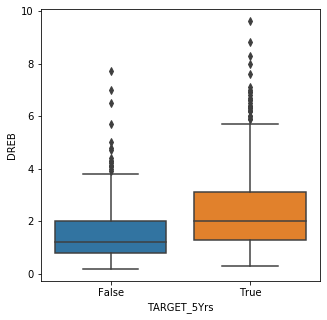

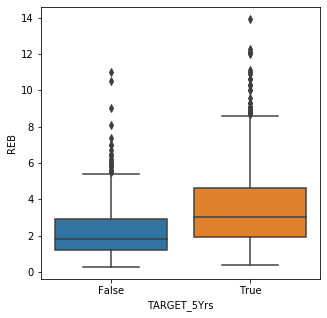

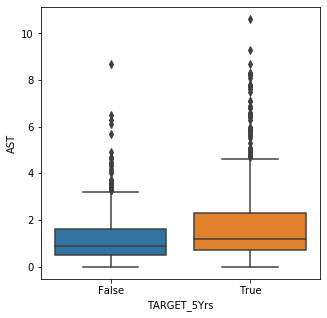

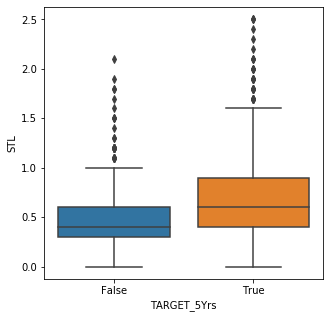

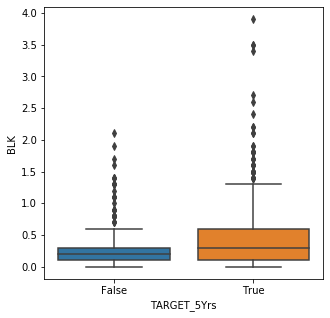

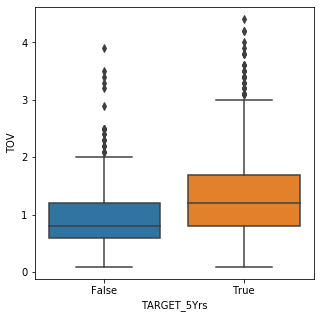

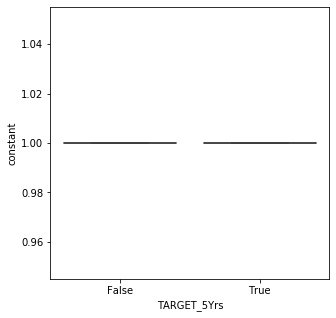

In [31]:
for col in X.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=nba_data["TARGET_5Yrs"], y=X[col])

<Figure size 1008x576 with 0 Axes>

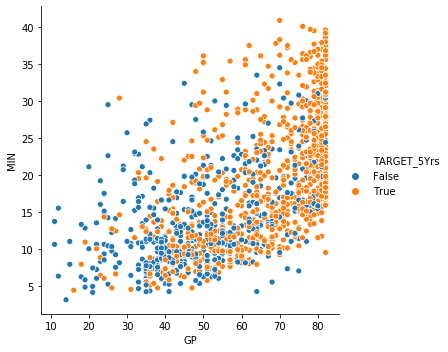

In [32]:
plt.figure(figsize=(14,8))
sns.relplot(x='GP',y='MIN',data=df,hue='TARGET_5Yrs')

<Figure size 1008x576 with 0 Axes>

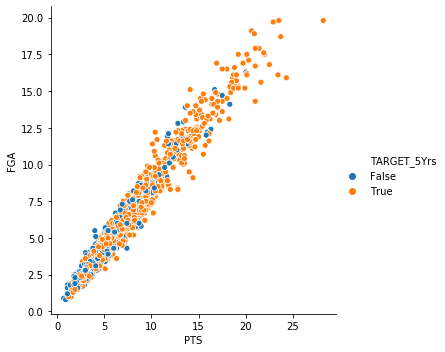

In [33]:
plt.figure(figsize=(14,8))
sns.relplot(x='PTS',y='FGA',data=df,hue='TARGET_5Yrs')

<Figure size 1008x576 with 0 Axes>

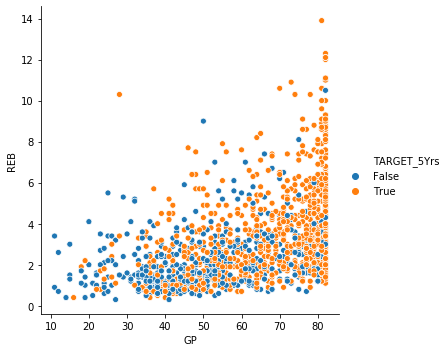

In [34]:
plt.figure(figsize=(14,8))
sns.relplot(x='GP',y='REB',data=df,hue='TARGET_5Yrs')

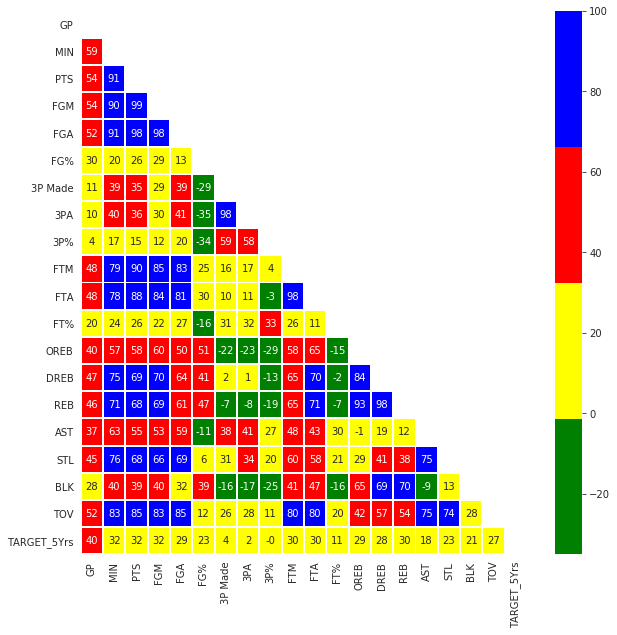

In [35]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [36]:
nba_data.shape

(1340, 21)

In [37]:
df.shape

(1340, 21)

In [38]:
df = df.drop_duplicates()
print( df.shape )

(1328, 21)


## There were twelve duplicates 